In [28]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa


In [29]:
def parser1(row):
    file_name = os.path.join("train_data", 'Crying','train_cry ('+str(row)+')' +'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect')
        #zcr =librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    print(row)
    return mfccs


In [30]:
def parser2(row):
    #file_name = os.path.join("train_data", 'Noise','train_noise ('+str(row)+')' +'.wav')
    file_name = os.path.join("six_sec_glass", 'g'+str(row) +'.wav')


    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 

        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect') 
        #zcr = librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        
        print("Error encountered while parsing file: ", file)
        return None, None

    print(row)
    return mfccs

In [31]:
def parser3(row):
    #file_name = os.path.join("train_data", 'Noise','train_noise ('+str(row)+')' +'.wav')
    file_name = os.path.join("noise_18jul",'noise'+str(row) +'.wav')

    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 

        #spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
        #spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)
        #rms=librosa.feature.rms(X, frame_length=2048, hop_length=512, center=True, pad_mode='reflect') 
        #zcr = librosa.feature.zero_crossing_rate(X, frame_length=512, hop_length=168, center=True)
        #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        
        print("Error encountered while parsing file: ", file)
        return None, None

    print(row)
    return mfccs

In [32]:
def feature():
    features=np.empty((0,64))
    label=np.empty((0,1))
 
    #cry
    #1200
    for i in range(1,1200):
        mfccs=parser1(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,1))
    #glass
    #1024
    for i in range(1,1024):
        mfccs=parser2(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,2))
    
    #noise 
    #1703
    #114,115,159,161,319,326,328
    for i in range(1,100):
        mfccs=parser3(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,0))
    
    for i in range(328,1703):
        mfccs=parser3(i)
        #ext_features = np.hstack([mfccs,mel])
        features = np.vstack([features,mfccs])
        label=np.vstack((label,0))
        
    return features,label

In [33]:
f,l=feature()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
328
329
330


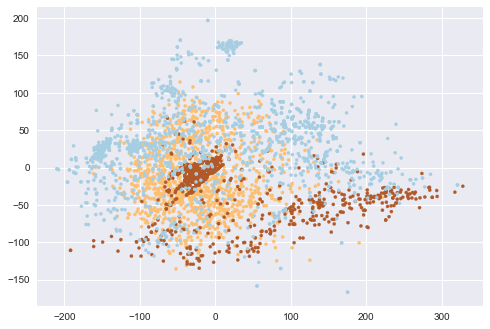

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

X=f
y=l.ravel()

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
plt.style.use('seaborn')
plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, s=10, cmap=plt.cm.Paired)
#mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64,hop_length=1280,n_fft=2560).T,axis=0) 



In [37]:
np.save('f_norm_aud_22500_5#pre_mfcc_cry_glass_newnoise.npy',f)
np.save('l_norm_aud_22500_5#pre_mfcc_cry_glass_newnoise.npy',l)

In [ ]:
f=np.load('f_22500_5#pre_mfcc_cry_glass_newnoise.npy')
l=np.load('l_22500_5#pre_mfcc_cry_glass_newnoise.npy')

In [139]:
print(f.shape)
print(l.shape)

(3924, 64)
(3924, 1)


In [39]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [76]:
clf = SVC(kernel='rbf',C=30,gamma=0.0001, degree=2,probability=True)
clf.fit(f, l.ravel())

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
print(l.shape)

(3696, 1)


In [60]:
t, sample_rate = librosa.load('yt_bcc.wav',sr=16000,mono=True) 

In [61]:
pre_emphasis = 2
X = np.append(t[0], t[1:] - pre_emphasis * t[:-1])
stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

In [62]:
features_t=np.empty((0,64))
#ext_features_t = np.hstack([mfccs,mel,contrast,tonnetz])
features_t = np.vstack([features_t,mfccs])


In [63]:
print(l.shape)
print(l)

(2046, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [64]:
clf.predict(features_t)

array([0.])

In [65]:
clf.predict_proba(features_t)

array([[0.99765269, 0.00234731]])

In [66]:
def parser3(row):
    file_name = os.path.join("glass", 'glass_test'+ str(row) +'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        X = (X-np.mean(X))/np.std(X)
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs

In [67]:
def feature_test():
    features=np.empty((0,64))
    y_test=np.empty((0,1))
    for i in range(1,99):
        mfccs=parser3(i)
        #ext_features = np.hstack([mfccs,rms,zcr])
        features = np.vstack([features,mfccs])
        y_test=np.vstack((y_test,2))
    return features,y_test

In [82]:
test_feature,y_test=feature_test()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [83]:
a=clf.predict(test_feature)
print(a)
clf.predict_proba(test_feature)


#print(y_test.shape)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]


array([[9.96590038e-02, 2.62341124e-02, 8.74106884e-01],
       [1.78089947e-02, 3.75046175e-03, 9.78440544e-01],
       [1.17007926e-02, 1.16749885e-03, 9.87131709e-01],
       [3.02234965e-06, 1.88651554e-06, 9.99995091e-01],
       [3.83072349e-06, 2.26838427e-06, 9.99993901e-01],
       [2.11951136e-06, 1.15178765e-06, 9.99996729e-01],
       [1.32583917e-06, 9.07503564e-07, 9.99997767e-01],
       [3.62381115e-07, 2.42031205e-07, 9.99999396e-01],
       [8.08766178e-02, 1.52078994e-01, 7.67044389e-01],
       [2.07260106e-02, 7.85913797e-02, 9.00682610e-01],
       [6.01988794e-02, 1.19853797e-02, 9.27815741e-01],
       [2.93487564e-02, 2.85206453e-01, 6.85444790e-01],
       [3.66435067e-01, 3.64971653e-02, 5.97067768e-01],
       [5.92440882e-03, 2.43737039e-02, 9.69701887e-01],
       [6.61357200e-03, 4.22789911e-04, 9.92963638e-01],
       [2.33143767e-03, 6.48896168e-04, 9.97019666e-01],
       [2.08479337e-03, 1.77646217e-04, 9.97737560e-01],
       [4.70108826e-06, 2.80970

In [84]:
for i,each in enumerate(a,start=1):
    print ("{}   {}".format(i,each))

1   2.0
2   2.0
3   2.0
4   2.0
5   2.0
6   2.0
7   2.0
8   2.0
9   2.0
10   2.0
11   2.0
12   2.0
13   2.0
14   2.0
15   2.0
16   2.0
17   2.0
18   2.0
19   2.0
20   2.0
21   2.0
22   2.0
23   2.0
24   2.0
25   2.0
26   2.0
27   2.0
28   2.0
29   2.0
30   2.0
31   2.0
32   2.0
33   2.0
34   2.0
35   2.0
36   2.0
37   2.0
38   2.0
39   2.0
40   2.0
41   2.0
42   2.0
43   2.0
44   2.0
45   2.0
46   2.0
47   2.0
48   2.0
49   2.0
50   2.0
51   2.0
52   2.0
53   2.0
54   2.0
55   2.0
56   1.0
57   1.0
58   2.0
59   2.0
60   2.0
61   2.0
62   2.0
63   1.0
64   1.0
65   1.0
66   1.0
67   1.0
68   1.0
69   1.0
70   1.0
71   1.0
72   1.0
73   0.0
74   1.0
75   2.0
76   2.0
77   2.0
78   2.0
79   2.0
80   2.0
81   2.0
82   2.0
83   2.0
84   2.0
85   2.0
86   0.0
87   2.0
88   2.0
89   2.0
90   2.0
91   2.0
92   2.0
93   2.0
94   2.0
95   2.0
96   2.0
97   2.0
98   2.0


In [85]:
print(test_feature.shape)
print(y_test.shape)

(98, 64)
(98, 1)


In [86]:
   np.unique(a,return_counts=True)

(array([0., 1., 2.]), array([ 2, 13, 83]))

In [87]:
acc = clf.score(test_feature, y_test)
print("acc=%0.3f" % acc)

acc=0.847


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(f, l.ravel(), test_size=0.4, random_state=0)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly','rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [20,30,40],'degree':[2,3,4]}]
                     
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('')

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print('')
    print(clf.best_params_)
    print('')
    print("Grid scores on development set:")
    print('')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print('')
    print("Detailed classification report:")
    print('')
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print('')
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 30, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.925 (+/-0.018) for {'C': 20, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
0.956 (+/-0.018) for {'C': 20, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.939 (+/-0.017) for {'C': 20, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
0.960 (+/-0.030) for {'C': 20, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.890 (+/-0.030) for {'C': 20, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}
0.923 (+/-0.020) for {'C': 20, 'degree': 2, 'gamma': 1e-05, 'kernel': 'rbf'}
0.943 (+/-0.029) for {'C': 20, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
0.956 (+/-0.018) for {'C': 20, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.943 (+/-0.020) for {'C': 20, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
0.960 (+/-0.030) for {'C': 20, 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf'}
0.846 (+/-0.022) for {'C': 20, 'degree': 3